In [168]:
import numpy as np
import tensorflow as tf

raw_text = 'He is the king. The king is royal . she is the queen. She is the royal'
corpus = raw_text.lower()

In [169]:
def split_text(corpus_raw):
    split_sequences = []
    sequences = corpus_raw.split('.')
    for s in sequences:
        split_sequences.append(s.split())
    return split_sequences

sequences = split_text(corpus)

In [145]:
def get_vocabs(text):
    text = text.replace(".", "")
    words = text.split()
    words = set(words)
    return words

In [170]:
def get_dictinary(words):
    word2int = {}
    int2word = {}
    
    for i, w in enumerate(words):
        word2int[w] = i
        int2word[i] = w
    return word2int, int2word

words = get_vocabs(corpus)
vocab_size = len(words)

word2int, int2word = get_dictinary(words)

In [149]:
def get_word_pair(sequence, word_index, window_size):
    pairs = []
    for nb_word in sequence[max(0, word_index-window_size) : min(word_index + window_size, len(sequence))+1]:
        if(nb_word != sequence[word_index]):
            pairs.append((sequence[word_index], nb_word))
    return pairs
    
def gen_xy_text(sequences, window_size=2):
    word_pairs = []
    for sequence in sequences:
        for word_index, word in enumerate(sequence):
            word_pairs += get_word_pair(sequence, word_index,window_size)
    return word_pairs

word_pairs = gen_xy_text(sequences, 2)

In [150]:
# print(word_pairs)

In [152]:
def convert_word_pairs(word_pairs, word2int= word2int):
    digit_pairs = []
    for w_pair in word_pairs:
        digit_pairs.append((word2int[w_pair[0]], word2int[w_pair[1]] ))
    return digit_pairs

def convert_digit_pairs(digit_pairs, int2word=int2word):
    word_pairs = []
    for d_pair in digit_pairs:
        word_pairs.append((int2word[d_pair[0]], int2word[d_pair[1]] ))
    return word_pairs

# converted_word_pairs = convert_digit_pairs(digit_xy)

def to_onehot_vector(value, vocab_size):
    onehot_vector = np.zeros(vocab_size)
    onehot_vector[value] = 1
    return onehot_vector


digit_xy = convert_word_pairs(word_pairs)
x_data = []
y_data = []
for xy in digit_xy:
    x_data.append(to_onehot_vector(xy[0], vocab_size))
    y_data.append(to_onehot_vector(xy[1], vocab_size))
x_data = np.array(x_data)    
y_data = np.array(y_data)    



In [153]:
def cross_entropy_loss(y_pre, y_true):
    return tf.reduce_mean( -tf.reduce_sum( y_true * tf.log(y_pre), reduction_indices=[1]))

In [154]:
embed_dim = 4
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
w_1 = tf.Variable(tf.random_normal([vocab_size, embed_dim]))
b_1 = tf.Variable(tf.random_normal([embed_dim]))

hidden = tf.matmul(x, w_1) + b_1
w_2 = tf.Variable(tf.random_normal([embed_dim, vocab_size]))
b = tf.Variable(tf.random_normal([vocab_size]))
temp_y = tf.matmul(hidden, w_2) + b

y_pre = tf.nn.softmax(temp_y)
y_true = tf.placeholder(tf.float32, shape=(None, vocab_size))
loss = cross_entropy_loss(y_pre, y_true)

session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
iters = 1000

for i in range(iters):
    feed_dict = {x: x_data, y_true: y_data}
    session.run(train, feed_dict=feed_dict)
    loss_val = session.run(loss, feed_dict=feed_dict)
    w1_val = session.run(w_1)

In [155]:
vectors = session.run(w_1 + b_1)

In [156]:
def eclidean_dist(vec1 , vec2):
    return np.sqrt(np.sum(np.square(vec1 - vec2)))

In [163]:
def find_closest(word, vectors):
    i_word = word2int[word]
    word_vector = vectors[i_word]
    min_index = 0
    min_dist = 0
    while(True):
        min_index = randint(0, len(vectors)-1)
        if(min_index != i_word):
            min_dist = eclidean_dist(word_vector, vectors[min_index])
            break
    for i, v in enumerate(vectors):
        dist = eclidean_dist(word_vector, v)
        if( i != i_word and dist < min_dist):
            min_index = i
            min_dist = dist
    return min_index, min_dist
word = 'royal'
min_index, min_dist = find_closest(word, vectors)
print(int2word[min_index])

queen


In [164]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

model = TSNE(n_components=2)
normalizer = preprocessing.Normalizer()

x_reduce = model.fit_transform(vectors)
x_reduce = normalizer.fit_transform(x_reduce, 'l2')
print(x_reduce)

[[-0.9021406   0.43144217]
 [ 0.18855017  0.98206353]
 [ 0.23116928 -0.9729135 ]
 [ 0.1378626   0.9904514 ]
 [-0.43885687  0.898557  ]
 [ 0.9800225   0.19888666]
 [ 0.6649313   0.7469045 ]]


/home/trung/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/trung/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
/home/trung/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3116: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/trung/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3122: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternat

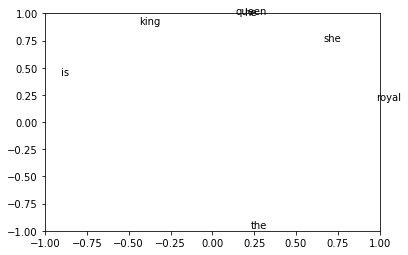

In [165]:
from matplotlib import pyplot as plt

def plot_space(embed_vector):
    plt.figure()
    plt.ylim(ymax=1,ymin=-1 )
    plt.xlim(xmax=1, xmin=-1)
    for i,v in enumerate(embed_vector):
        plt.annotate(int2word[i], xy=(v[0], v[1]))
    plt.show()

plot_space(x_reduce)


## DDaay la tieu de


day la noi dung 
doand sfvsffvksdfv